In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

### Task 1
Here we are exploring the data, understanding the variables and the coding of the data in general to know the range, unique values and the overview.

In [3]:
yrbs = pd.read_table('/Users/manasi/Desktop/yrbs.tsv.bz2')
print(yrbs.head())
print(yrbs.shape)
print(yrbs.year.unique())
print(yrbs.age.unique())
print(yrbs.sex.unique())
print(yrbs.meth.unique())
print(yrbs.tv.unique())
print(yrbs.state.unique())


   year  age sex  meth  tv state
0  2003   13   M     0   1    XX
1  2003   13   M     1   1    XX
2  2003   13   M     1   1    XX
3  2003   13   M     0   1    XX
4  2003   13   M     0   0    XX
(58077, 6)
[2003 2005 2007 2009]
[13 14 15 16 17]
['M' 'F']
[0 1]
[1 0]
['XX' 'MT']


### 1.1 Computing an additional variable
We add an extra column called 'before' that takes in the value 0 based on the year filter of 2003 and 2005 and the value of 1 based on the filter year 2007 and 2009.

In [25]:
yrbs['before'] = 0
yrbs['before'][ yrbs['year'].isin([2003,2005]) ] = 0

/Users/manasi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
yrbs['before'][ yrbs['year'].isin([2007,2009]) ] = 1

/Users/manasi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
yrbs.tail()

,year,age,sex,meth,tv,state,period,before
58072,2009,17,F,0,0,MT,after,1
58073,2009,17,F,0,0,MT,after,1
58074,2009,17,F,0,0,MT,after,1
58075,2009,17,F,0,0,MT,after,1
58076,2009,17,F,0,0,MT,after,1


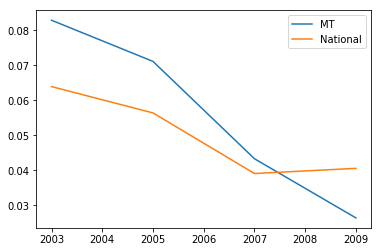

In [29]:
ym = yrbs.groupby(['year', 'state']).meth.mean().reset_index()
plt.plot(ym.year[ym.state=='MT'], ym.meth[ym.state=='MT'], label='MT')
plt.plot(ym.year[ym.state=='XX'], ym.meth[ym.state=='XX'], label='National')
plt.legend()

### Task 2 (above)

Looking at the above results we see that the decline is really steep for other parts of the nation. Specifically to Montana, we see that while 2005 to 2007 mark a decrease, the line starts to rise from 2007. This could be an overview to us in terms of understanding the diff-in-diff trends that we are about to explore later in the results. 

### Task 3 
Looking at the table above, the mean usage of meth in Montana before the campaign was 0.07 which could be ball parked from the graph above. After the campaign, the mean meth usage went down to 0.03. This means that the campaign was indeed effective. Looking at the table below, we can say that the campaign was also effective for other parts of the nation considering the value fell down from 0.06 to 0.03. However, this is an outcome considering only one variable into account. 

In [59]:
print(yrbs[yrbs.state == 'MT'].groupby('before').meth.mean())
m = smf.ols(formula = 'meth ~ before', data = yrbs[yrbs.state == 'MT'])
print(yrbs[yrbs.state == 'XX'].groupby('before').meth.mean())
m1 = smf.ols(formula = 'meth ~ before', data = yrbs[yrbs.state == 'XX'])

before
0    0.076734
1    0.038115
Name: meth, dtype: float64
before
0    0.060319
1    0.039923
Name: meth, dtype: float64


In [39]:

res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     67.66
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           2.19e-16
Time:                        19:02:10   Log-Likelihood:                 417.76
No. Observations:                9754   AIC:                            -831.5
Df Residuals:                    9752   BIC:                            -817.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0767      0.003     23.106      0.0

We can verify this by using regression and observing the intercepts. Here as we see, for Montana, the intercept value relates to before campaign. The value is 0.0767 which matches. The calculated diff-in-diff for above table comes up to 0.038115-0.076734=-0.0386. The 'before' argument below the intercept coincides with our diff-in-diff value. Same goes for the model fit observed for the State 'XX'. 

In [40]:
res1 = m1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     106.3
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           6.75e-25
Time:                        19:02:33   Log-Likelihood:                 5183.8
No. Observations:               48323   AIC:                        -1.036e+04
Df Residuals:                   48321   BIC:                        -1.035e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0603      0.001     42.518      0.0

In [43]:
mod3 = smf.ols(formula='meth~before*age*sex*tv', data=yrbs[yrbs.state=='MT'])
res3 = mod3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     6.459
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           6.08e-14
Time:                        19:08:14   Log-Likelihood:                 432.32
No. Observations:                9754   AIC:                            -832.6
Df Residuals:                    9738   BIC:                            -717.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

In [44]:
mod4 = smf.ols(formula='meth~before*age*sex*tv', data=yrbs[yrbs.state=='XX'])
res4 = mod4.fit()
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     12.16
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           9.15e-31
Time:                        19:11:22   Log-Likelihood:                 5221.7
No. Observations:               48323   AIC:                        -1.041e+04
Df Residuals:                   48307   BIC:                        -1.027e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

In [50]:
print(yrbs.groupby(['state','before']).meth.mean())


state  before
MT     0         0.076734
       1         0.038115
XX     0         0.060319
       1         0.039923
Name: meth, dtype: float64


In [48]:
m = smf.ols(formula='meth~state', data=yrbs[yrbs.before==1])
res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3503
Date:                Wed, 18 Apr 2018   Prob (F-statistic):              0.554
Time:                        19:16:18   Log-Likelihood:                 6404.0
No. Observations:               29728   AIC:                        -1.280e+04
Df Residuals:                   29726   BIC:                        -1.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0381      0.003     13.648      

In [57]:
m = smf.ols(formula='meth~state*age*tv*sex*state', data=yrbs[yrbs.before==1])
res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.184
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           8.61e-08
Time:                        19:34:20   Log-Likelihood:                 6435.2
No. Observations:               29728   AIC:                        -1.284e+04
Df Residuals:                   29712   BIC:                        -1.271e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [58]:
m = smf.ols(formula='meth~before*state', data=yrbs)
res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     62.92
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           1.31e-40
Time:                        19:36:44   Log-Likelihood:                 5566.9
No. Observations:               58077   AIC:                        -1.113e+04
Df Residuals:                   58073   BIC:                        -1.109e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0767      0

In [56]:

0.076734-0.060319


0.016415